In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


         Passengers
Month              
1949-01       112.0
1949-02       118.0
1949-03       132.0
1949-04       129.0
1949-05       121.0


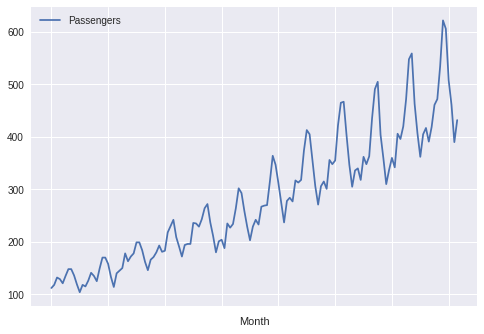

In [3]:
df = pd.read_csv('/content/drive/My Drive/Seq_models/international-airline-passengers.csv', index_col='Month')
print(df.head())
df.plot()

In [4]:
# Data Cleansing
columns_to_keep = ['Passengers']
df = df[columns_to_keep]
df['Passengers'] = df['Passengers'].apply(lambda x: x*1000)
df.index.names = ['Month']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 146


,Passengers
Month,
1949-01,112000.0
1949-02,118000.0
1949-03,132000.0
1949-04,129000.0
1949-05,121000.0


In [0]:
df['Passengers'] = df['Passengers']/1000  ### Normalizing the data

In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [0]:
# Null Values?
df.isnull().sum()

Passengers    2
dtype: int64

In [0]:
print(df.isnull().any(axis=1).sum())

2


In [0]:
df.dropna(inplace=True)

In [0]:
df.isnull().sum()

Passengers    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f481f8afb70>]],
      dtype=object)

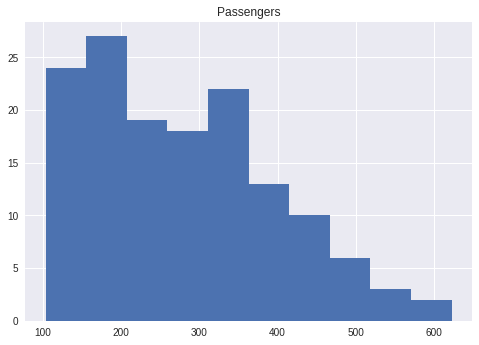

In [0]:
df.hist(bins=10)

In [0]:
len(df[df['Passengers'] == 0])

0

In [0]:
# Scaled Data
print('Min', np.min(df))
print('Max', np.max(df))

Min Passengers    104.0
dtype: float64
Max Passengers    622.0
dtype: float64


In [0]:
dataset = df.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [0]:
print(scaled[:10])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]]


In [0]:
#Create the model
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 100
test: 44


In [0]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

100 1
0
X 0 to 1
[0.01544402]
Y 1
0.02702702702702703
1
X 1 to 2
[0.02702703]
Y 2
0.05405405405405403
2
X 2 to 3
[0.05405405]
Y 3
0.04826254826254825
3
X 3 to 4
[0.04826255]
Y 4
0.03281853281853281
4
X 4 to 5
[0.03281853]
Y 5
0.05984555984555981
5
X 5 to 6
[0.05984556]
Y 6
0.08494208494208491
6
X 6 to 7
[0.08494208]
Y 7
0.08494208494208491
7
X 7 to 8
[0.08494208]
Y 8
0.06177606177606179
8
X 8 to 9
[0.06177606]
Y 9
0.028957528957528955
9
X 9 to 10
[0.02895753]
Y 10
0.0
10
X 10 to 11
[0.]
Y 11
0.02702702702702703
11
X 11 to 12
[0.02702703]
Y 12
0.02123552123552122
12
X 12 to 13
[0.02123552]
Y 13
0.04247104247104247
13
X 13 to 14
[0.04247104]
Y 14
0.07142857142857142
14
X 14 to 15
[0.07142857]
Y 15
0.05984555984555981
15
X 15 to 16
[0.05984556]
Y 16
0.04054054054054054
16
X 16 to 17
[0.04054054]
Y 17
0.08687258687258684
17
X 17 to 18
[0.08687259]
Y 18
0.1274131274131274
18
X 18 to 19
[0.12741313]
Y 19
0.1274131274131274
19
X 19 to 20
[0.12741313]
Y 20
0.10424710424710423
20
X 20 to 21
[0.

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(98, 1, 1)
(42, 1, 1)


In [0]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.
#create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/200
 - 1s - loss: 0.0479
Epoch 2/200
 - 0s - loss: 0.0208
Epoch 3/200
 - 0s - loss: 0.0193
Epoch 4/200
 - 0s - loss: 0.0186
Epoch 5/200
 - 0s - loss: 0.0174
Epoch 6/200
 - 0s - loss: 0.0166
Epoch 7/200
 - 0s - loss: 0.0160
Epoch 8/200
 - 0s - loss: 0.0152
Epoch 9/200
 - 0s - loss: 0.0146
Epoch 10/200
 - 0s - loss: 0.0134
Epoch 11/200
 - 0s - loss: 0.0144
Epoch 12/200
 - 0s - loss: 0.0133
Epoch 13/200
 - 0s - loss: 0.0128
Epoch 14/200
 - 0s - loss: 0.0114
Epoch 15/200
 - 0s - loss: 0.0127
Epoch 16/200
 - 0s - loss: 0.0107
Epoch 17/200
 - 0s - loss: 0.0111
Epoch 18/200
 - 0s - loss: 0.0110
Epoch 19/200
 - 0s - loss: 0.0105
Epoch 20/200
 - 0s - loss: 0.0098
Epoch 21/200
 - 0s - loss: 0.0104
Epoch 22/200
 - 0s - loss: 0.0101
Epoch 23/200
 - 0s - loss: 0.0101
Epoch 24/200
 - 0s - loss: 0.0092
Epoch 25/200
 - 0s - loss: 0.0075
Epoch 26/200
 - 0s - loss: 0.0081
Epoch 27/200
 - 0s - loss: 0.0077
Epoch 28/200
 - 0s - loss: 0.0074
Epoch 29/200
 - 0s - loss: 0.0087
Epoch 30/200
 - 0s - lo

In [0]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.09 RMSE
Test Score: 59.58 RMSE


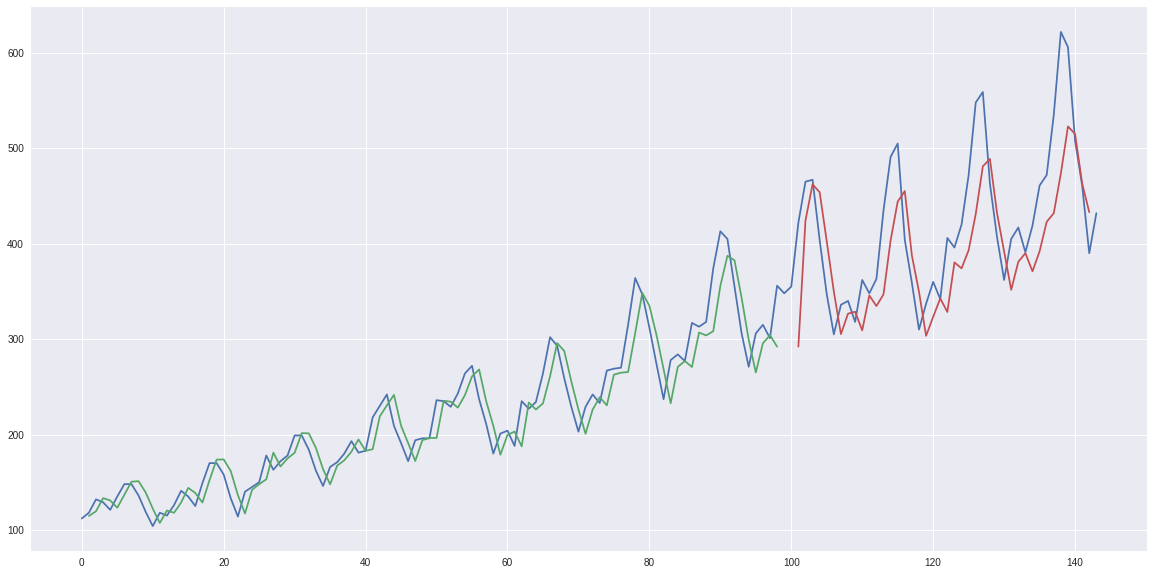

In [0]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()